# Mercedes-Benz Greener Manufacturing

Dataset: https://www.kaggle.com/code/emrullahyediyildiz/mercedes-benz-greener-manufacturing/input

<img src='mercedes.jpg'>

In [48]:
import os
from pathlib import Path
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
df=pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')
df2=pd.read_csv('sample_submission.csv')

In [6]:
df.head(),df1.head(),df2.head()

(   ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
 0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
 1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
 2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
 3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
 4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   
 
    X380  X382  X383  X384  X385  
 0     0     0     0     0     0  
 1     0     0     0     0     0  
 2     0     1     0     0     0  
 3     0     0     0     0     0  
 4     0     0     0     0     0  
 
 [5 rows x 378 columns],
    ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X375  X376  X377  X378  X379  X380  \
 0   1  az  v   n  f  d  t  a  w    0  ...     0     0     0     1     0     0   
 1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     1     0     0     0   
 2   3  az  v  as  f  d  a  j  j    0  ..

In [40]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [44]:
df.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

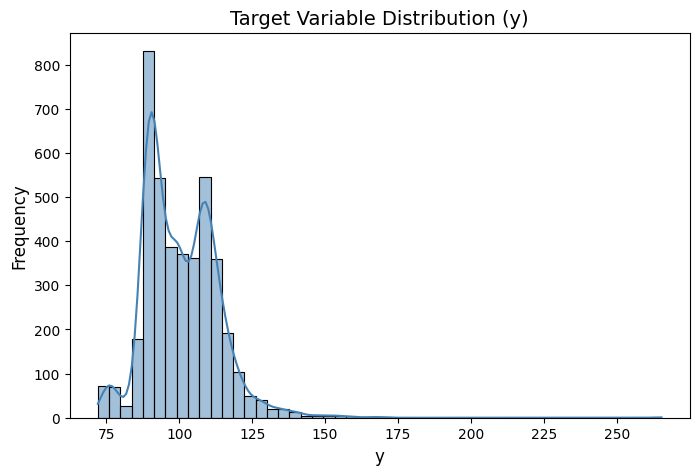

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(df["y"], kde=True, bins=50, color="steelblue")
plt.title("Target Variable Distribution (y)", fontsize=14)
plt.xlabel("y", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

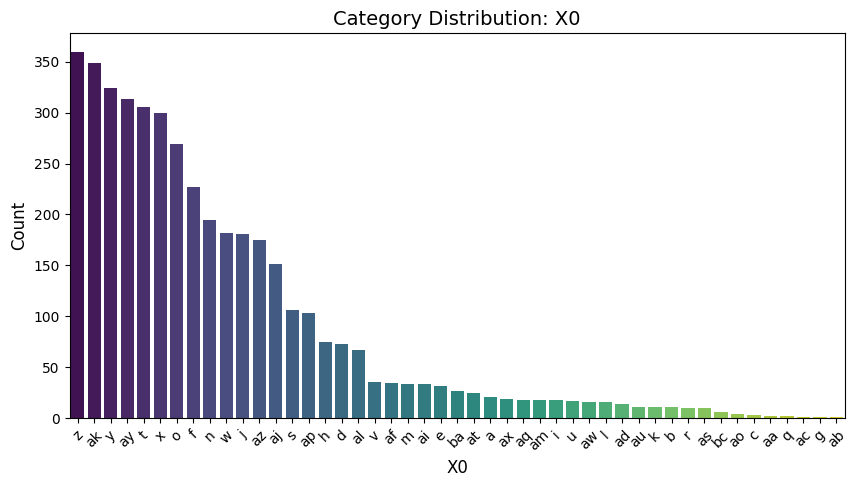

In [56]:
cat_col = "X0"

plt.figure(figsize=(10,5))
sns.countplot(data=df, x=cat_col, order=df[cat_col].value_counts().index, palette="viridis")
plt.title(f"Category Distribution: {cat_col}", fontsize=14)
plt.xlabel(cat_col, fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

##  Feature Engineering

In [59]:
df=df.drop('ID',axis=1)

In [61]:
x=pd.get_dummies(df.drop('y',axis=1))
y=df['y']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
gbr = GradientBoostingRegressor(random_state=42,n_estimators=400,learning_rate=0.05,max_depth=4,subsample=0.9)
model=gbr.fit(x_train, y_train)

In [85]:
tahmin=model.predict(x_test)

In [87]:
tahmin

array([ 94.75857248,  92.99149485, 115.8262255 ,  77.21294747,
       112.59471935,  97.7361742 ,  92.65814473, 105.34297738,
       103.32764754, 113.02638373,  80.48992319,  91.99073476,
        93.02430051, 103.75391727,  94.35183412,  94.4236548 ,
       111.99653973,  92.90481627,  94.63082828, 113.21138397,
       117.50051292,  92.73426082,  93.42420303, 101.05691307,
        94.1426469 , 110.06347756,  93.84836571,  80.79098224,
        93.77494217,  94.18879768,  92.57831477, 103.49675862,
        93.92530749, 109.90522821,  96.83994539, 116.18103077,
       111.11966235,  94.99545115,  92.91221236,  93.69385853,
       117.48600358, 111.03057069,  97.6539117 , 112.98647484,
        95.83612753,  95.80541074,  93.51878221, 102.13437738,
       112.4751847 , 103.10260219,  93.09678238, 100.58663974,
       113.71715231, 103.20727102,  93.21523194,  94.48903847,
        95.94633543, 112.33680429,  95.55932623,  93.10565957,
       112.39721382,  77.73104729,  95.18572872,  94.61

In [89]:
from sklearn.metrics import r2_score,mean_squared_error

In [181]:
mean_squared_error(y_test,tahmin)**0.5

8.501373452874597

In [93]:
r2_score(y_test,tahmin)

0.5356673394777636

r2:0.53
rmse:8.50

## ALGO TEST

In [104]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Define classifiers
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "MultinomialNB": MultinomialNB()
}

def algo_test(x, y):
    # Ensure y is categorical
    if y.dtype.kind in 'f':  # If y is a float (continuous)
        # Convert continuous to categorical (e.g., using binning)
        y = pd.qcut(y, q=3, labels=['Low', 'Medium', 'High'])

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
    metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1"], index=classifiers.keys())
    
    print("Veriler hazır, modeller deneniyor...")
    for name, model in classifiers.items():
        print(f"{name} modeli eğitiliyor!..")
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        
        metrics.loc[name, "Accuracy"] = accuracy_score(y_test, predictions)
        metrics.loc[name, "Precision"] = precision_score(y_test, predictions, average="micro")
        metrics.loc[name, "Recall"] = recall_score(y_test, predictions, average="micro")
        metrics.loc[name, "F1"] = f1_score(y_test, predictions, average="micro")
        
        print(f"Confusion Matrix for {name}:")
        print(confusion_matrix(y_test, predictions))

    print("Eğitim tamamlandı.")
    
    metrics.sort_values("F1", ascending=False, inplace=True)
    
    print("En başarılı model: ", metrics.index[0])
    
    best_model_name = metrics.index[0]
    best_model = classifiers[best_model_name]
    best_predictions = best_model.predict(x_test)
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, best_predictions))
    print("Classification Report:")
    print(classification_report(y_test, best_predictions))
    
    return metrics

# Example of usage
# Assuming 'data' is your DataFrame loaded from the CSV and 'target_column' is your target variable
# x = data.drop(columns=['target_column'])
# y = data['target_column']
# metrics = algo_test(x, y)
# print(metrics)

In [106]:
algo_test(x,y)

Veriler hazır, modeller deneniyor...
BernoulliNB modeli eğitiliyor!..
Confusion Matrix for BernoulliNB:
[[190  15  80]
 [ 14 212  47]
 [ 40 101 143]]
LogisticRegression modeli eğitiliyor!..


C:\Users\P53\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Confusion Matrix for LogisticRegression:
[[216  15  54]
 [  2 219  52]
 [ 36 123 125]]
DecisionTreeClassifier modeli eğitiliyor!..
Confusion Matrix for DecisionTreeClassifier:
[[202  10  73]
 [ 13 176  84]
 [ 70  91 123]]
RandomForestClassifier modeli eğitiliyor!..
Confusion Matrix for RandomForestClassifier:
[[215  15  55]
 [  3 221  49]
 [ 39 120 125]]
GradientBoostingClassifier modeli eğitiliyor!..
Confusion Matrix for GradientBoostingClassifier:
[[217  19  49]
 [  0 262  11]
 [ 26 149 109]]
KNeighborsClassifier modeli eğitiliyor!..
Confusion Matrix for KNeighborsClassifier:
[[210  17  58]
 [ 20 193  60]
 [ 65 103 116]]
AdaBoostClassifier modeli eğitiliyor!..
Confusion Matrix for AdaBoostClassifier:
[[232  19  34]
 [  1 245  27]
 [103 141  40]]
MultinomialNB modeli eğitiliyor!..
Confusion Matrix for MultinomialNB:
[[186  15  84]
 [ 12 207  54]
 [ 37 101 146]]
Eğitim tamamlandı.
En başarılı model:  GradientBoostingClassifier
Confusion Matrix:
[[217  19  49]
 [  0 262  11]
 [ 26 149 1

,Accuracy,Precision,Recall,F1
GradientBoostingClassifier,0.698337,0.698337,0.698337,0.698337
RandomForestClassifier,0.666271,0.666271,0.666271,0.666271
LogisticRegression,0.665083,0.665083,0.665083,0.665083
BernoulliNB,0.647268,0.647268,0.647268,0.647268
MultinomialNB,0.640143,0.640143,0.640143,0.640143
KNeighborsClassifier,0.61639,0.61639,0.61639,0.61639
AdaBoostClassifier,0.614014,0.614014,0.614014,0.614014
DecisionTreeClassifier,0.595012,0.595012,0.595012,0.595012


algo_test e göre accuracy 0.69 ile  en yüksek GradientBoostingClassifier görünüyor.

## Regression

In [187]:
joblib.dump(gbr, 'gb_model.pkl')
joblib.dump(x.columns, 'columns.pkl')
print('✅ gb_model.pkl ve columns.pkl has been saved.')

✅ gb_model.pkl ve columns.pkl has been saved.


In [195]:
x = pd.get_dummies(df.drop(columns=["y"]))
y = df["y"]

x_test = pd.get_dummies(df1.drop(columns=["ID"]))
x_test, _ = x_test.align(x, join="right", axis=1, fill_value=0)

In [199]:
gbr.fit(x, y)                   
test_preds = gbr.predict(x_test)  

submission = pd.DataFrame({"ID": df1["ID"], "y": test_preds})
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv created:", submission.shape)

✅ submission.csv created: (4209, 2)


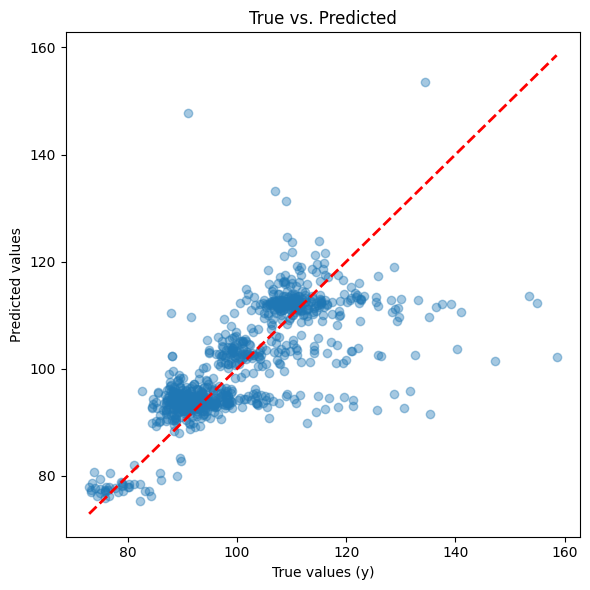

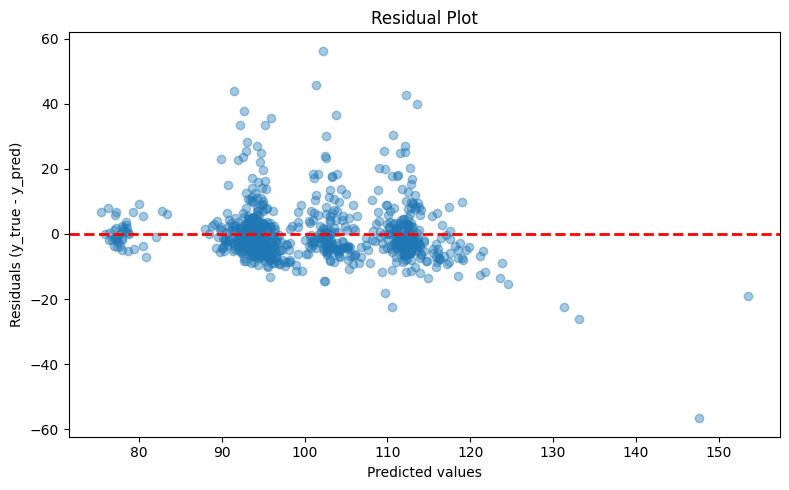

In [201]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred, alpha=0.4)
mn, mx = np.min([y_val.min(), y_pred.min()]), np.max([y_val.max(), y_pred.max()])
plt.plot([mn, mx], [mn, mx], "r--", linewidth=2)  # ideal line
plt.xlabel("True values (y)")
plt.ylabel("Predicted values")
plt.title("True vs. Predicted")
plt.tight_layout()
plt.show()

# --- 2) Residual Plot ---
residuals = y_val - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted values")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

In [205]:
# --- Column types ---
cat_cols = [c for c in x.columns if x[c].dtype == "object"]
num_cols = [c for c in x.columns if c not in cat_cols]

# --- Preprocessing ---
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

# --- Model ---
gbr = GradientBoostingRegressor(random_state=42)

# --- Pipeline ---
pipe = Pipeline(steps=[("preprocess", preprocess),("model", gbr)])

# --- Fit ---
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('num', 'passthrough',
                                                  ['X10', 'X11', 'X12', 'X13',
                                                   'X14', 'X15', 'X16', 'X17',
                                                   'X18', 'X19', 'X20', 'X21',
                                                   'X22', 'X23', 'X24', 'X26',
                                                   'X27', 'X28', 'X29', 'X30',
                                                   'X31', 'X32', 'X33', 'X34',
                                                   'X35', 'X36', 'X37', 'X38',
                                                   'X39', 'X40', ...])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [207]:
# --- Save full pipeline ---
joblib.dump(pipe, "gb_pipeline.pkl")

['gb_pipeline.pkl']